<a href="https://colab.research.google.com/github/tecnologia23/tecnologia23.github.io/blob/main/Proyecto_M1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colombia_COVID19_Coronavirus_casos_diarios.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,OBJECTID,NUEVOS_CASOS,TOTAL_CASOS,TOTAL_MUERTES,TOTAL_RECUPERADOS,FECHA_ACTUALIZACION,GlobalID,NUEVOS_MUERTOS,NUEVO_RECUPERADOS
0,1237,1,1,0,0,2020/03/06 05:00:00+00,bfbde439-2467-4f24-9b33-2fb38e3abd61,0,0
1,1238,0,1,0,0,2020/03/07 05:00:00+00,c21b35c0-d55e-44e0-8768-9356c9c1d545,0,0
2,1239,0,1,0,0,2020/03/08 05:00:00+00,0a1a91f7-15eb-4118-9879-1ab4d959b1d2,0,0
3,1240,2,3,0,0,2020/03/09 05:00:00+00,2fb6f539-a27c-4d00-84e1-b19193ceb500,0,0
4,1241,0,3,0,0,2020/03/10 05:00:00+00,f14b28c9-d593-4a53-9e2a-d7965c38c22c,0,0


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convertir FECHA_ACTUALIZACION a datetime y extraer solo la fecha
df['FECHA_ACTUALIZACION'] = pd.to_datetime(df['FECHA_ACTUALIZACION'])

# Crear una columna numérica: días desde la primera fecha
df['dias_desde_inicio'] = (df['FECHA_ACTUALIZACION'] - df['FECHA_ACTUALIZACION'].min()).dt.days

# Definir características (X) y variable objetivo (y)
X = df[['dias_desde_inicio', 'NUEVOS_MUERTOS', 'NUEVO_RECUPERADOS']]
y = df['NUEVOS_CASOS']

# Manejar valores nulos (si los hay, rellenar con 0)
X = X.fillna(0)
y = y.fillna(0)

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (647, 3)
X_test shape: (162, 3)
y_train shape: (647,)
y_test shape: (162,)


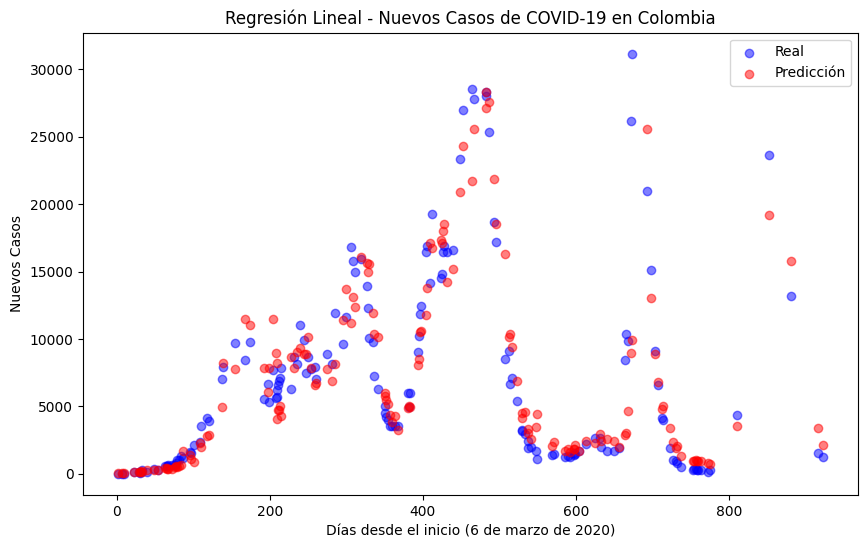

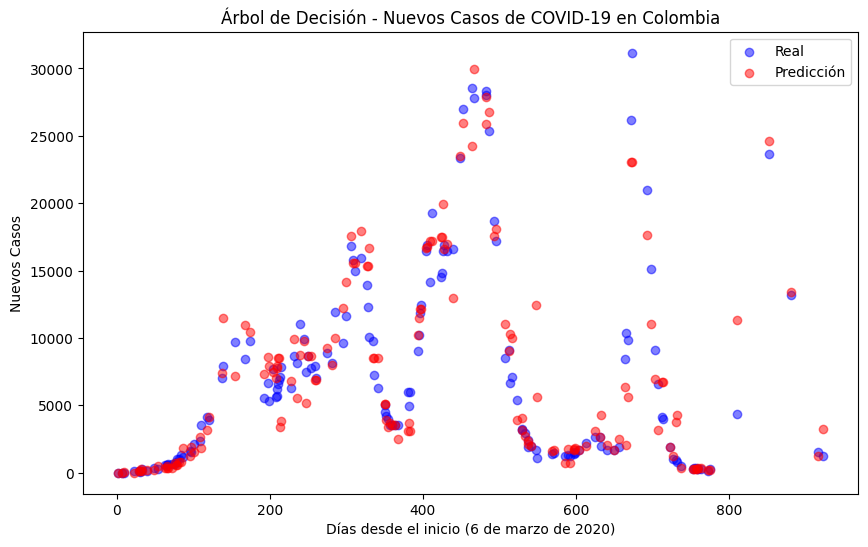

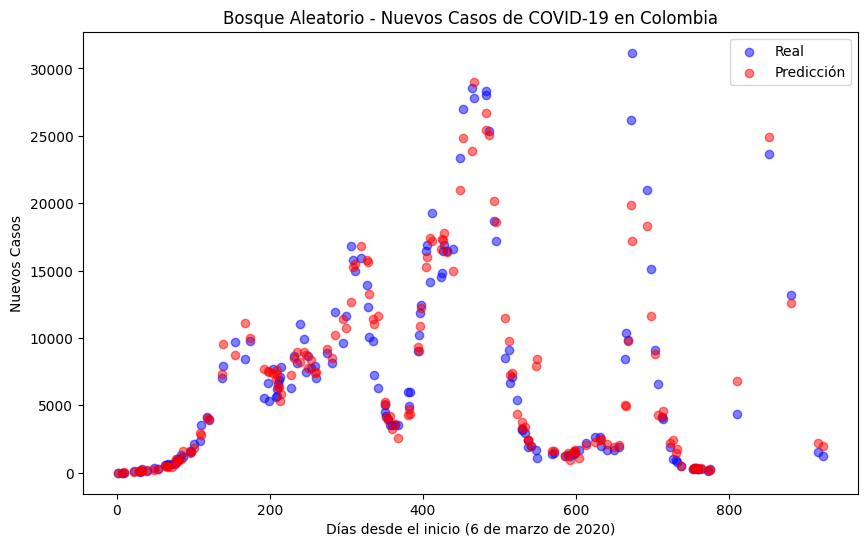

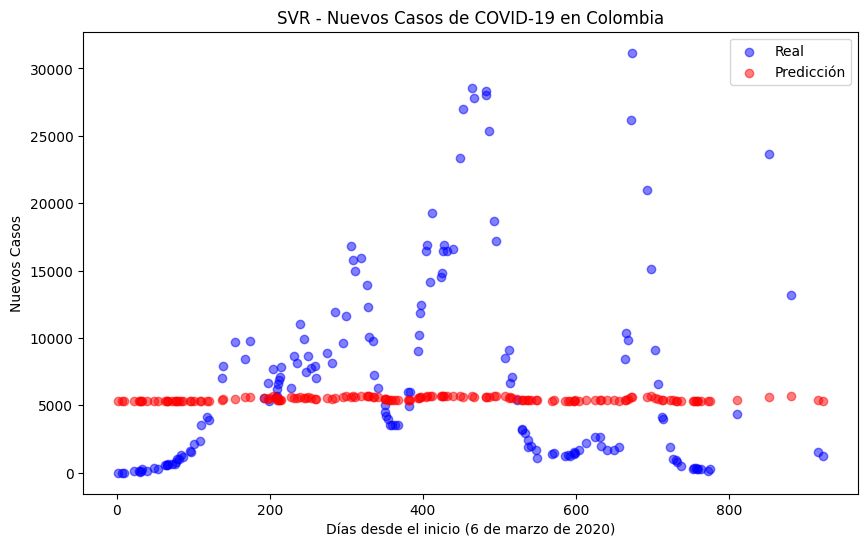

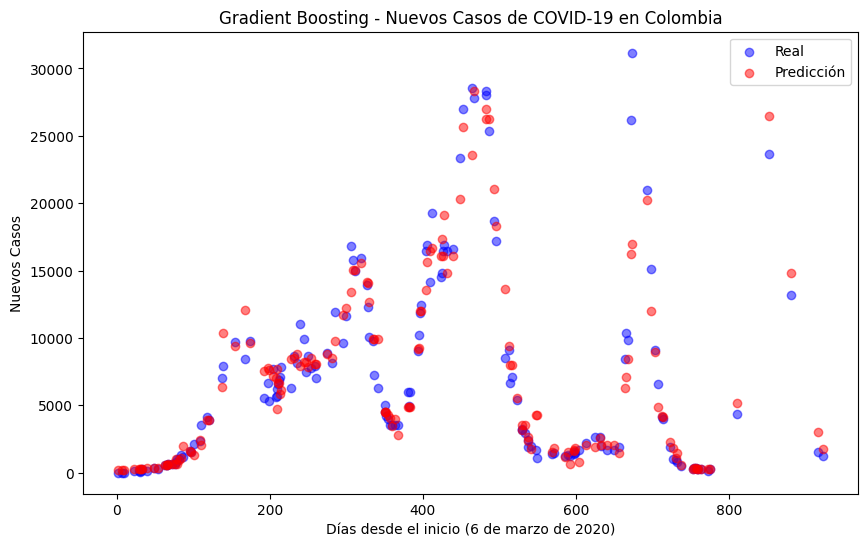

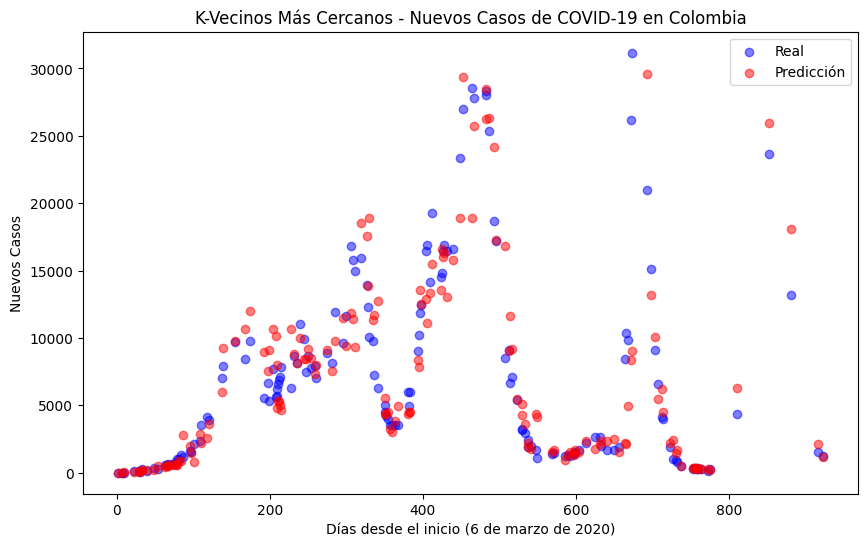


Resultados de los modelos:
                   Modelo           MSE        R²
0        Regresión Lineal  9.112859e+06  0.826072
1       Árbol de Decisión  4.829401e+06  0.907826
2        Bosque Aleatorio  4.041846e+06  0.922857
3                     SVR  5.368686e+07 -0.024666
4       Gradient Boosting  3.757035e+06  0.928293
5  K-Vecinos Más Cercanos  1.126039e+07  0.785085


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV
#df = pd.read_csv('Colombia_COVID19_Coronavirus_casos_diarios.csv')

# Convertir FECHA_ACTUALIZACION a datetime
df['FECHA_ACTUALIZACION'] = pd.to_datetime(df['FECHA_ACTUALIZACION'])

# Crear columna numérica: días desde la primera fecha
df['dias_desde_inicio'] = (df['FECHA_ACTUALIZACION'] - df['FECHA_ACTUALIZACION'].min()).dt.days

# Definir características (X) y variable objetivo (y)
X = df[['dias_desde_inicio', 'NUEVOS_MUERTOS', 'NUEVO_RECUPERADOS']]
y = df['NUEVOS_CASOS']

# Manejar valores nulos
X = X.fillna(0)
y = y.fillna(0)

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos a probar
models = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'Bosque Aleatorio': RandomForestRegressor(random_state=42, n_estimators=100),
    'SVR': SVR(kernel='rbf'),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'K-Vecinos Más Cercanos': KNeighborsRegressor(n_neighbors=5)
}

# Diccionario para almacenar métricas
results = []

# Iterar sobre los modelos
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones
    prediccion_prueba = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, prediccion_prueba)
    r2 = r2_score(y_test, prediccion_prueba)

    # Guardar métricas
    results.append({
        'Modelo': name,
        'MSE': mse,
        'R²': r2
    })

    # Crear gráfico de dispersión
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test['dias_desde_inicio'], y_test, label="Real", color='blue', alpha=0.5)
    plt.scatter(X_test['dias_desde_inicio'], prediccion_prueba, label="Predicción", color='red', alpha=0.5)
    plt.title(f"{name} - Nuevos Casos de COVID-19 en Colombia")
    plt.xlabel("Días desde el inicio (6 de marzo de 2020)")
    plt.ylabel("Nuevos Casos")
    plt.legend()
    plt.show()

# Crear DataFrame con resultados
results_df = pd.DataFrame(results)

# Mostrar tabla comparativa
print("\nResultados de los modelos:")
print(results_df)